# Iris Flowers Classification ML Project

This project aims to predict the optimum number of clusters for the Iris dataset using the K-Means clustering algorithm and represent it visually. The Elbow method is used to determine the optimal number of clusters.

<img src="download.jpg" width="1000">

The Iris dataset contains 150 samples from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals.

### **Importing Libraries**

In [93]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **Exploratory Data Analysis**

#### **Loading the Data**

Before we dive into modeling, we need to take a look at the data we are working with

In [94]:
iris_data = pd.read_csv("Iris.csv")

iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
iris_data.info() #Taking a look at the basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
iris_data.iloc[:, 1:].isnull().sum() #checking to see if there are null values in the dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [75]:
iris_data.iloc[:, 1:].describe() #Checking the basic numeric information of the variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
iris_data.iloc[:, 1:].kurtosis(numeric_only=True)

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

In [77]:
iris_data.iloc[:, 1:].skew(numeric_only=True)

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

The values for skewness and kurtosis falls into the range of normally distributed dataset

#### **Graphical Analysis**

Visualizing the data to understand the different features of our data and the relationships between them

In [78]:
plt.style.use('fivethirtyeight')

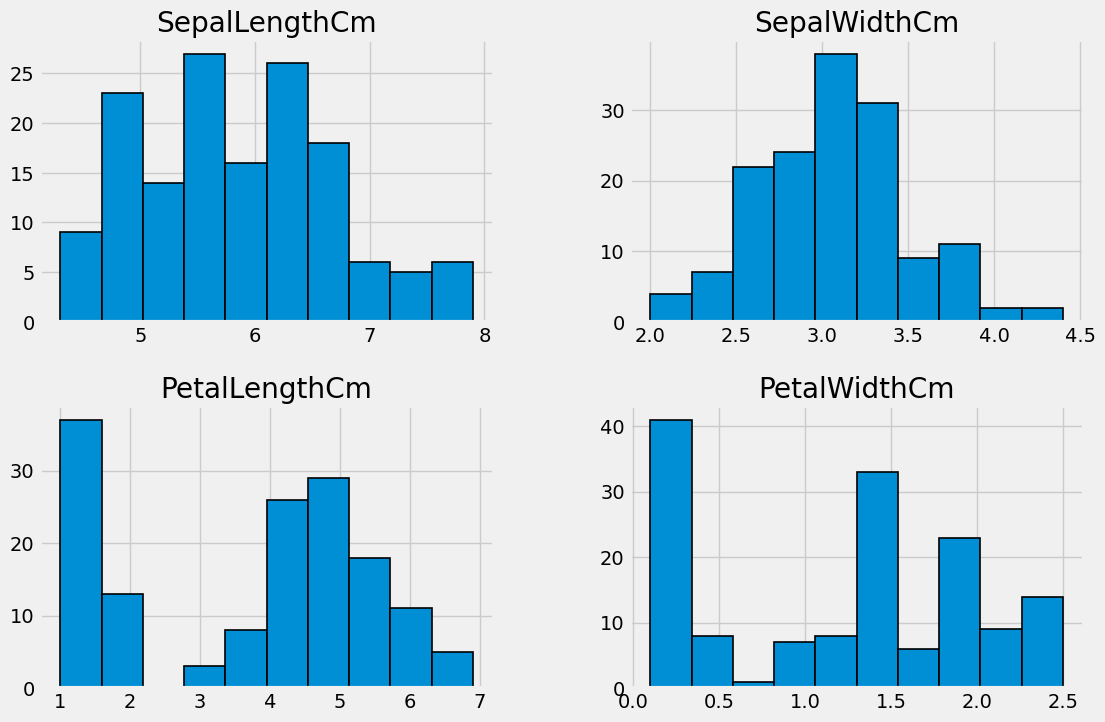

In [79]:
iris_data.iloc[:, 1:5].hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.show()

C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

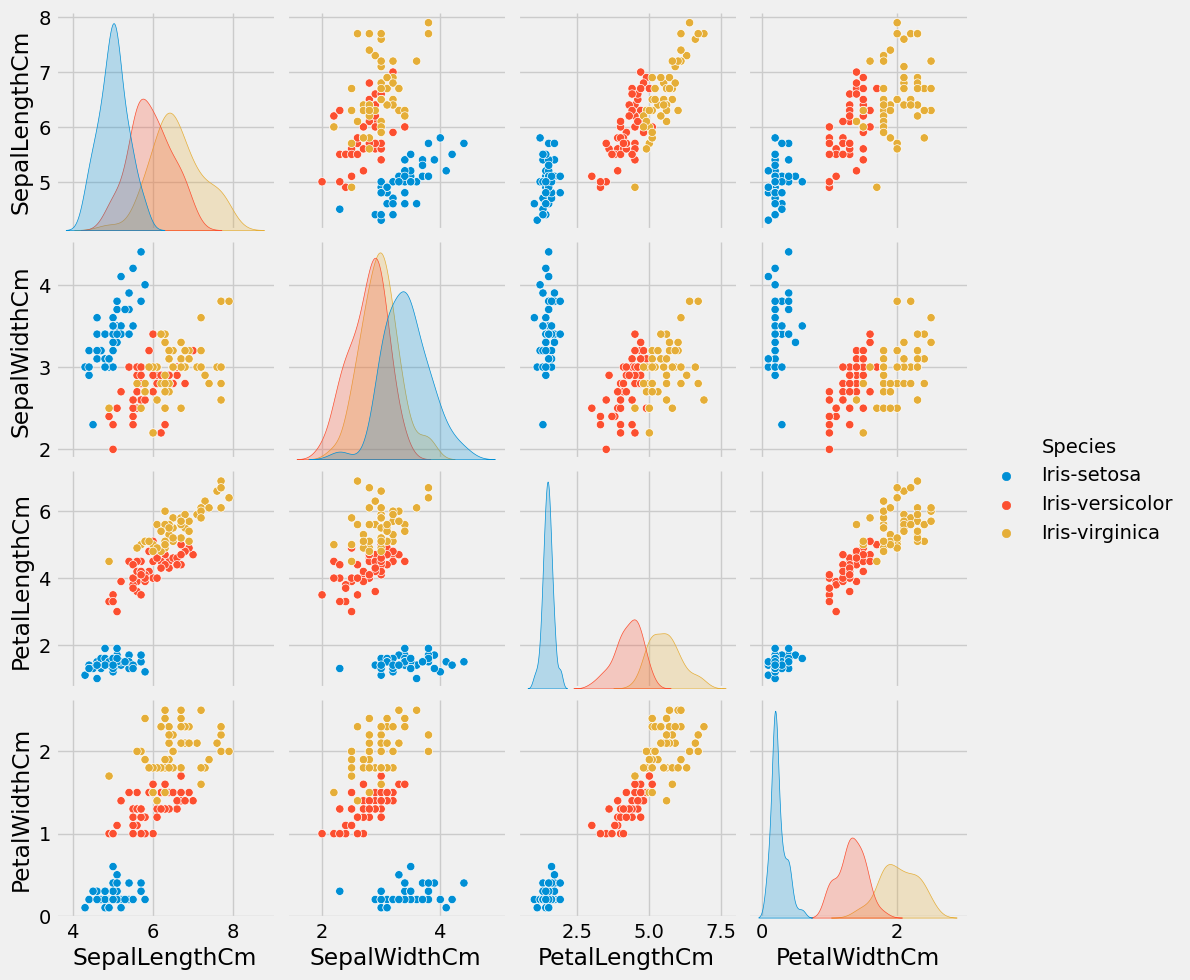

In [80]:
sns.pairplot(iris_data.iloc[:, 1:], hue='Species')
plt.show()

Let's take a look at the correlation between the features

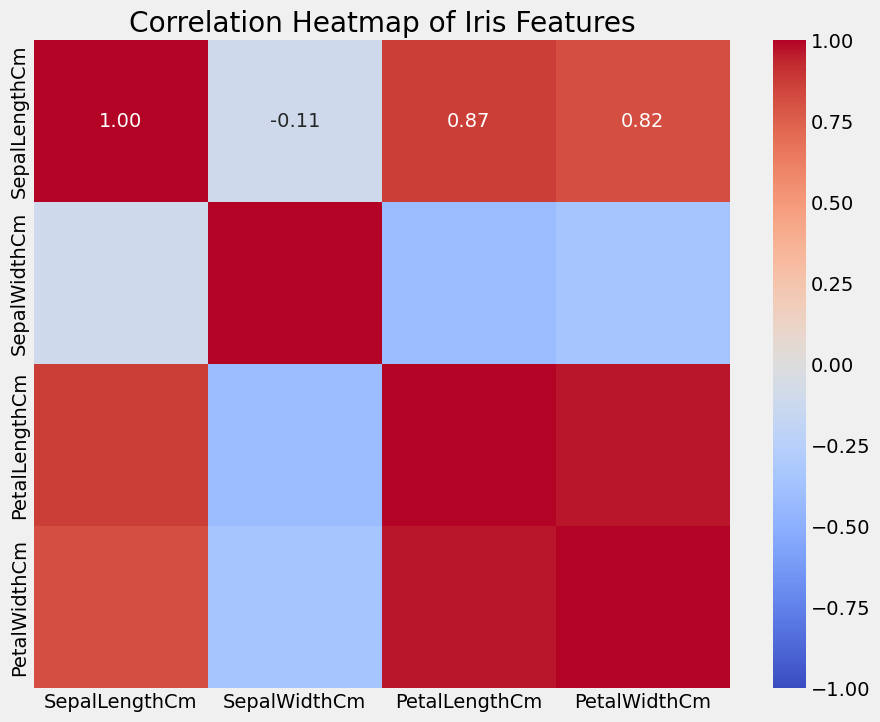

In [81]:
# Compute the correlation matrix
corr_matrix = iris_data.iloc[:, 1:5].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

From the heatmap above, there is a strong positive correlation between
- `SepalLengthCm` and `SepalLengthCm`

- `SepalLengthCm` and `PetalWidthCm`

### **Preprocessing the Data**

#### **Convert Categorical Column**

To be able to to predict the optimum number of clusters for the dataset effectively, we need to convert the categorical values to numeric usng label encoding

In [82]:
# Display the unique values in the species column
print(iris_data['Species'].unique())

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the species column
iris_data['Species_Encoded'] = label_encoder.fit_transform(iris_data['Species'])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


0 - Iris-setosa  1 - Iris-versicolor  2 - Iris-virginica

In [83]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


#### **Drop Columns**

We will drop the Id and Species columns. Also we change the names of the columns

In [84]:
iris_data_prep = iris_data.drop(["Id", "Species"], axis=1)

new_column_names = {
    'SepalLengthCm': 'Sepal Length (cm)',
    'SepalWidthCm': 'Sepal Width (cm)',
    'PetalLengthCm': 'Petal Length (cm)',
    'PetalWidthCm': 'Petal Width (cm)',
    'Species_Encoded': 'Species'
}
iris_data_prep.rename(columns=new_column_names, inplace=True)


In [85]:
iris_data_prep

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### **Separate the Data**

Here we will separate the features from the target variable

In [86]:
# Separate the features and the target
X = iris_data_prep.iloc[:, :4]
X

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### **Standardize the Data**

We will go ahead to standaedize the data

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **K-Means Modelling**

#### **Determine the Optimum Number of Clusters**

We need to determine the optimum number of clusters for the k-means model tpo classify our data efficiently

C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

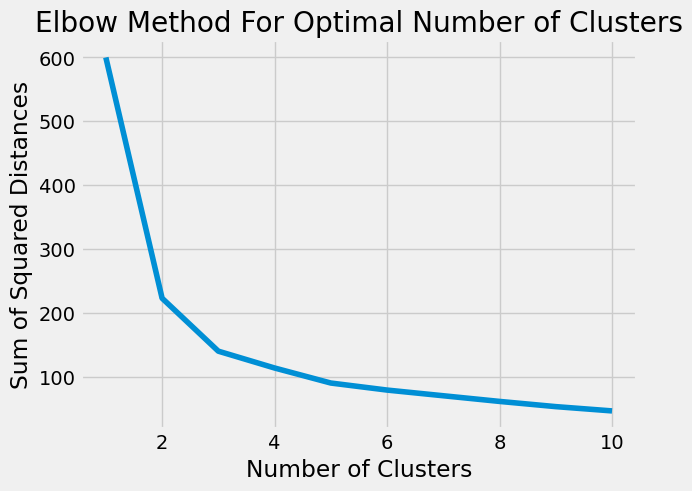

In [89]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances') # Within cluster sum of squares
plt.show()

From the graph we can the optimum clusters is where the elbow occurs. This is when the within sum of squared distances between clusters (WCSS) doesn't decrease significantly with every iteration.

So we will choose the optimum number of clusters as **3**.

#### **Fit the K-Means Model**

Now we will fit the k-means model to our data

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\rayap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### **Visualize the Clusters**

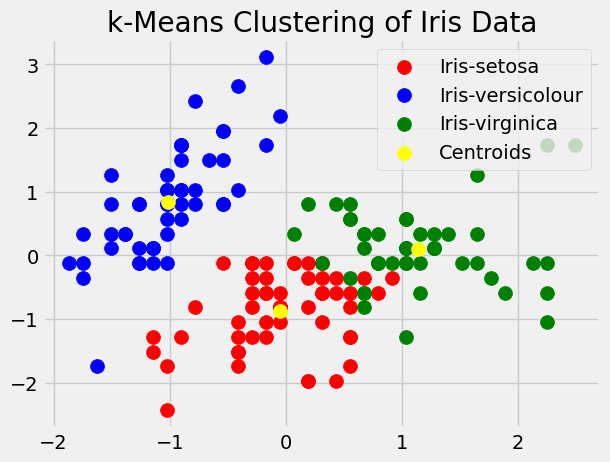

In [92]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means Clustering of Iris Data')

plt.legend()